This notebook presents an analogous selection of results from the paper [The Distribution of Wealth and the Marginal Propensity to Consume](http://econ.jhu.edu/people/ccarroll/papers/cstwMPC), using the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit. In this version of the model, the results are presented for the estimation procedure with the **rate of return** as the key parameter of interest. 

In [1]:
# This cell does some standard python setup!

import code.calibration as parameters
import warnings  # The warnings package allows us to ignore some harmless but alarming warning messages
from code.calibration import SCF_wealth, SCF_weights
from code.estimation import estimate

# Import related generic python packages
import matplotlib.pyplot as plt  # Plotting tools
import numpy as np
from HARK.utilities import get_lorenz_shares

warnings.filterwarnings("ignore")


def mystr(number):
    return f"{number:.4f}"

## Perpetual Youth Model Without Return Preference Heterogeneity

In [2]:
"""
This will run the absolute minimum amount of work that actually produces
relevant output-- no aggregate shocks, perpetual youth, matching net worth.
Will run both beta-point and beta-dist versions.
"""

"""
Copied here from do_min.py.
Design decisions about whether to include this code explicitly,
or import it, or execute it as is here, TBD.
"""

'\nCopied here from do_min.py.\nDesign decisions about whether to include this code explicitly,\nor import it, or execute it as is here, TBD.\n'

In [3]:
# For speed here, use the "tractable" version of the model
# This is not the "right" model, but illustrates the key point
"""
This options file specifies parameter heterogeneity, making the choice in the paper:
uniformly distributed discount factors.
"""
param_name = "Rfree"  # Which parameter to introduce heterogeneity in
dist_type = "lognormal"  # Which type of distribution to use

"""
This options file specifies the "standard" work options for cstwMPC, estimating the model only.
"""
run_estimation = True  # Runs the estimation if True
# Choose which sensitivity analyses to run: rho, xi_sigma, psi_sigma, mu, urate, mortality, g, R
run_sensitivity = [False, False, False, False, False, False, False, False]
# Computes K/Y ratio for a wide range of beta; should have do_beta_dist = False
find_beta_vs_KY = False
# Uses a "tractable consumer" rather than solving full model when True
do_tractable = True

# Solve for the $\beta-Point$ (do_param_dist=False) for speed
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""

do_param_dist = False  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
# Matches liquid assets data when True, net worth data when False
do_liquid = False

Beginning an estimation with the specification name PYLognrmrratePointIndNetWorth...
1.0063522012578616
get_KY_ratio_difference tried center = 1.0063522012578616 and got -9.046227489836356
1.1163522012578617
get_KY_ratio_difference tried center = 1.1163522012578617 and got 746057147403175.0
1.006352201257863
get_KY_ratio_difference tried center = 1.006352201257863 and got -9.046227489836253
1.0337796448321375
get_KY_ratio_difference tried center = 1.0337796448321375 and got 1220.762277465089
1.0067557029299328
get_KY_ratio_difference tried center = 1.0067557029299328 and got -9.014332312183996
1.0135929919005524
get_KY_ratio_difference tried center = 1.0135929919005524 and got -6.004547465213422
1.0137906035627333
get_KY_ratio_difference tried center = 1.0137906035627333 and got -5.554310438779648
1.0237851241974354
get_KY_ratio_difference tried center = 1.0237851241974354 and got 92.2824628577587
1.0161057505140334
get_KY_ratio_difference tried center = 1.0161057505140334 and got 3.56

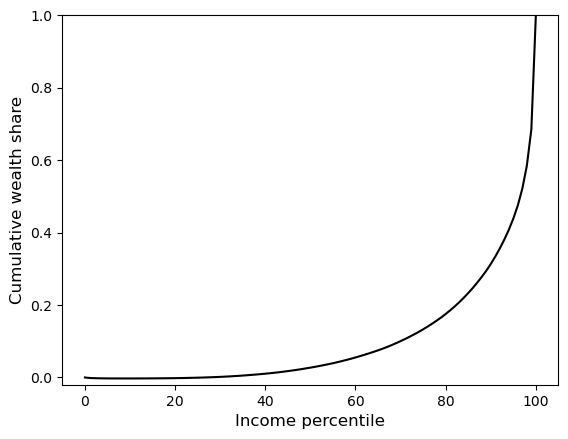

Estimate is center=1.0153576975671124, spread=0.0
Lorenz distance is 42.485036731314125
Average MPC for all consumers is 0.095
Average MPC in the top percentile of W/Y is 0.065
Average MPC in the top decile of W/Y is 0.068
Average MPC in the top quintile of W/Y is 0.069
Average MPC in the second quintile of W/Y is 0.071
Average MPC in the middle quintile of W/Y is 0.071
Average MPC in the fourth quintile of W/Y is 0.073
Average MPC in the bottom quintile of W/Y is 0.193
Average MPC in the top percentile of y is 0.072
Average MPC in the top decile of y is 0.074
Average MPC in the top quintile of y is 0.081
Average MPC in the second quintile of y is 0.113
Average MPC in the middle quintile of y is 0.115
Average MPC in the fourth quintile of y is 0.079
Average MPC in the bottom quintile of y is 0.089
Average MPC for the employed is 0.093
Average MPC for the unemployed is 0.127
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
62.801% are in the bottom wealt

In [4]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
}


EstimationEconomy = estimate(options, parameters)

In [5]:
MyGuys = EstimationEconomy.agents[0]
MyGuys.check_conditions()
print(MyGuys.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=1.01536 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.99893 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.99893 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98382 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.99893 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00220 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99269 : The Mortality-Adjusted Growth Patien

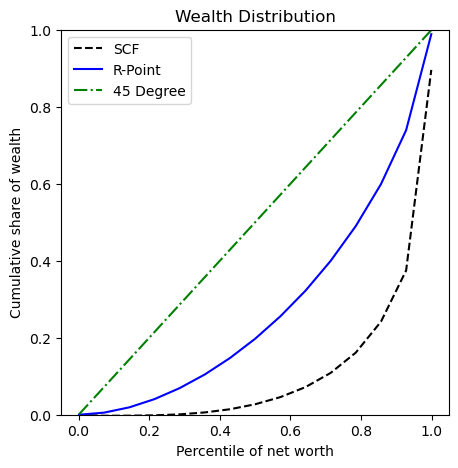

In [6]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth = EstimationEconomy.reap_state["aLvl"][0]
sim_Lorenz_points = get_lorenz_shares(sim_wealth, percentiles=pctiles)

# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points, "-b", label="R-Point")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_1")

## Perpetual Youth Model with Return Preference Heterogeneneity


In [7]:
"""
This options file establishes the second simplest model specification possible:
with heterogeneity, no aggregate shocks, perpetual youth model, matching net worth.
"""
do_param_dist = True  # Do param-dist version if True, param-point if False
do_lifecycle = False  # Use lifecycle model if True, perpetual youth if False
do_agg_shocks = False  # Solve the FBS aggregate shocks version of the model
do_liquid = False  # Matches liquid assets data when True, net worth data when False
do_tractable = False  #

Beginning an estimation with the specification name PYLognrmrrateDistIndNetWorth...
0.9905415209227546
0.9982863810855634
1.0026023523189236
1.006302426039006
1.0100163146725663
1.0143838392402496
1.0223325745259675
get_KY_ratio_difference tried center = 1.0063522012578616 and got 1.8707093146490568
find_lorenz_distance_at_target_KY tried spread = 0.01 and got 9.569670365476007
0.9905415307656834
0.9982863910054212
1.0026023622816258
1.0063024360385293
1.0100163247090148
1.0143838493200061
1.0223325846847506
get_KY_ratio_difference tried center = 1.0063522112578616 and got 1.8707393322156438
find_lorenz_distance_at_target_KY tried spread = 0.01 and got 9.569678897968862
0.9905415051968441
0.9982863730032704
1.0026023485266062
1.006302425939406
1.0100163182934907
1.014383847254199
1.0223325905912148
get_KY_ratio_difference tried center = 1.0063522012578616 and got 1.8707521932654636
find_lorenz_distance_at_target_KY tried spread = 0.01000001 and got 9.56969373953606
0.9905415209227546
0

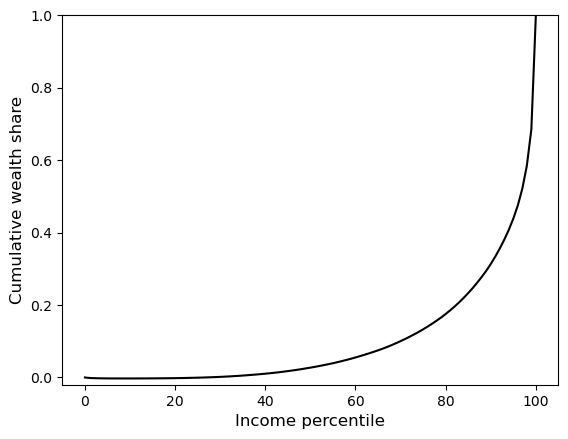

Estimate is center=1.0063522012578616, spread=0.01
Lorenz distance is 9.569670365476007
Average MPC for all consumers is 0.352
Average MPC in the top percentile of W/Y is 0.063
Average MPC in the top decile of W/Y is 0.065
Average MPC in the top quintile of W/Y is 0.068
Average MPC in the second quintile of W/Y is 0.177
Average MPC in the middle quintile of W/Y is 0.340
Average MPC in the fourth quintile of W/Y is 0.471
Average MPC in the bottom quintile of W/Y is 0.704
Average MPC in the top percentile of y is 0.329
Average MPC in the top decile of y is 0.317
Average MPC in the top quintile of y is 0.321
Average MPC in the second quintile of y is 0.348
Average MPC in the middle quintile of y is 0.357
Average MPC in the fourth quintile of y is 0.335
Average MPC in the bottom quintile of y is 0.399
Average MPC for the employed is 0.338
Average MPC for the unemployed is 0.545
Average MPC for the retired is nan
Of the population with the 1/3 highest MPCs...
49.213% are in the bottom wealt

In [8]:
options = {
    "param_name": param_name,
    "dist_type": dist_type,
    "run_estimation": run_estimation,
    "run_sensitivity": run_sensitivity,
    "find_beta_vs_KY": find_beta_vs_KY,
    "do_tractable": do_tractable,
    "do_param_dist": do_param_dist,
    "do_lifecycle": do_lifecycle,
    "do_agg_shocks": do_agg_shocks,
    "do_liquid": do_liquid,
    "do_combo_estimation": True,
}


EstimationEconomy = estimate(options, parameters)

In [9]:
MyGuys_First = EstimationEconomy.agents[0]
MyGuys_First.check_conditions()
print(MyGuys_First.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=0.99054 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=0.97476 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=0.97476 : The Absolute Patience Factor satisfies the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98406 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=0.97476 : The Growth Patience Factor satisfies the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=0.97794 : The Risk-Modified Growth Patience Factor satisfies the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.96866 : The Mortality-Adjusted Growth Patie

In [10]:
MyGuys_Last = EstimationEconomy.agents[-1]
MyGuys_Last.check_conditions()
print(MyGuys_Last.bilt["conditions_report"])

β=0.99000 : intertemporal discount factor (DiscFac)
R=1.02233 : risk free interest factor (Rfree)
G=1.00000 : permanent income growth factor (PermGroFac)
ρ=1.01000 : coefficient of relative risk aversion (CRRA)
ℒ=0.99375 : survival probability (LivPrb)
Þ=(βℒR)^(1/ρ)=1.00573 : absolute patience factor (APFac)
℘=0.01400 : probability of worst income shock realization (WorstPrb)

APFac=1.00573 : The Absolute Patience Factor violates the Absolute Impatience Condition (AIC) Þ < 1.
RPFac=0.98376 : The Return Patience Factor satisfies the Return Impatience Condition (RIC) Þ/R < 1.
WRPFac=0.01437 : The Weak Return Patience Factor satisfies the Weak Return Impatience Condition (WRIC) ℘ Þ/R < 1.
GPFacRaw=1.00573 : The Growth Patience Factor violates the Growth Impatience Condition (GICRaw) Þ/G < 1.
GPFacMod=1.00901 : The Risk-Modified Growth Patience Factor violates the Risk-Modified Growth Impatience Condition (GICMod) Þ/(G‖Ψ‖_(-1)) < 1.
GPFacLiv=0.99944 : The Mortality-Adjusted Growth Patience

In [11]:
# Construct the Lorenz curves and plot them

pctiles = np.linspace(0.001, 0.999, 15)
SCF_Lorenz_points = get_lorenz_shares(
    SCF_wealth, weights=SCF_weights, percentiles=pctiles
)

sim_wealth_2 = np.concatenate(EstimationEconomy.reap_state["aLvl"])
sim_Lorenz_points_2 = get_lorenz_shares(sim_wealth_2, percentiles=pctiles)



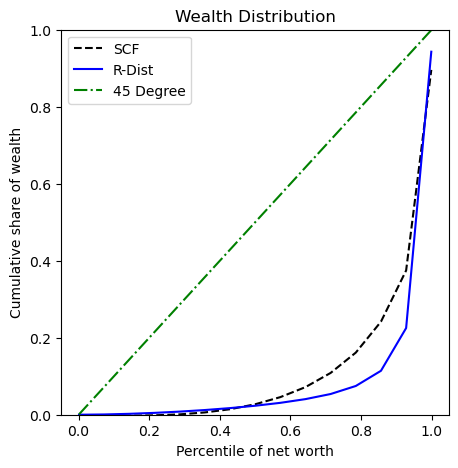

In [12]:
# Plot
plt.figure(figsize=(5, 5))
plt.title("Wealth Distribution")
plt.plot(pctiles, SCF_Lorenz_points, "--k", label="SCF")
plt.plot(pctiles, sim_Lorenz_points_2, "-b", label="R-Dist")
plt.plot(pctiles, pctiles, "g-.", label="45 Degree")
plt.xlabel("Percentile of net worth")
plt.ylabel("Cumulative share of wealth")
plt.legend(loc=2)
plt.ylim([0, 1])
plt.show("wealth_distribution_2")

## Comparing the Estimation to Data on the Rate of Return

First, we present the graph of the estimated distribution of the rate of return across households which minimizes the Lorenz distance, given the empirical targets for wealth levels from the SCF data.

### Graph of the empirical distribution of safe and risky returns from Fagereng et al. (2015)

![Image Description](/Users/dc/Library/CloudStorage/OneDrive-JohnsHopkins/research/GitHub-forks/econ-ark/DistributionOfWealthMPC/DistributionOfWealthMPC/DistEmpReturnsFagereng.png)

